In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Gagan\University\Sem 5\Discrete Maths\Project\ind_nifty500list.csv')
df

,Company Name,Industry,Symbol,Series,ISIN Code
0,360 ONE WAM Ltd.,Financial Services,360ONE,EQ,INE466L01038
1,3M India Ltd.,Diversified,3MINDIA,EQ,INE470A01017
2,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
3,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
4,AIA Engineering Ltd.,Capital Goods,AIAENG,EQ,INE212H01026
...,...,...,...,...,...
495,Zee Entertainment Enterprises Ltd.,Media Entertainment & Publication,ZEEL,EQ,INE256A01028
496,Zensar Technolgies Ltd.,Information Technology,ZENSARTECH,EQ,INE520A01027
497,Zomato Ltd.,Consumer Services,ZOMATO,EQ,INE758T01015
498,Zydus Lifesciences Ltd.,Healthcare,ZYDUSLIFE,EQ,INE010B01027


In [2]:
df['Symbol'] = df['Symbol'] + '.NS'

industry_abbr = {
    'Financial Services': 'FIN',
    'Diversified': 'DIV',
    'Capital Goods': 'CAP',
    'Construction Materials': 'CON',
    'Chemicals': 'CHE',
    'Healthcare': 'HEA',
    'Power': 'POW',
    'Metals & Mining': 'MET',
    'Services': 'SER',
    'Oil Gas & Consumable Fuels': 'OIL',
    'Fast Moving Consumer Goods': 'FMC',
    'Consumer Services': 'CSV',
    'Forest Materials': 'FOR',
    'Information Technology': 'IT',
    'Textiles': 'TEX',
    'Automobile and Auto Components': 'AUT',
    'Consumer Durables': 'CND',
    'Realty': 'REA',
    'Telecommunication': 'TEL',
    'Construction': 'CST',
    'Media Entertainment & Publication': 'MED'
}

df['Industry_Abbr'] = df['Industry'].map(industry_abbr)
df['Industry_Symbol_Abbr'] = df['Industry_Abbr'] + '_' + df['Symbol']
df

,Company Name,Industry,Symbol,Series,ISIN Code,Industry_Abbr,Industry_Symbol_Abbr
0,360 ONE WAM Ltd.,Financial Services,360ONE.NS,EQ,INE466L01038,FIN,FIN_360ONE.NS
1,3M India Ltd.,Diversified,3MINDIA.NS,EQ,INE470A01017,DIV,DIV_3MINDIA.NS
2,ABB India Ltd.,Capital Goods,ABB.NS,EQ,INE117A01022,CAP,CAP_ABB.NS
3,ACC Ltd.,Construction Materials,ACC.NS,EQ,INE012A01025,CON,CON_ACC.NS
4,AIA Engineering Ltd.,Capital Goods,AIAENG.NS,EQ,INE212H01026,CAP,CAP_AIAENG.NS
...,...,...,...,...,...,...,...
495,Zee Entertainment Enterprises Ltd.,Media Entertainment & Publication,ZEEL.NS,EQ,INE256A01028,MED,MED_ZEEL.NS
496,Zensar Technolgies Ltd.,Information Technology,ZENSARTECH.NS,EQ,INE520A01027,IT,IT_ZENSARTECH.NS
497,Zomato Ltd.,Consumer Services,ZOMATO.NS,EQ,INE758T01015,CSV,CSV_ZOMATO.NS
498,Zydus Lifesciences Ltd.,Healthcare,ZYDUSLIFE.NS,EQ,INE010B01027,HEA,HEA_ZYDUSLIFE.NS


In [3]:
import yfinance as yf

tickers = df['Symbol'].to_list()
data = yf.download(tickers, start = "2014-04-01", end = "2024-03-31")["Close"]
data.index = pd.to_datetime(data.index).strftime('%Y-%m-%d')
data

[*********************100%***********************]  500 of 500 completed

8 Failed downloads:
['GODIGIT.NS', 'BHARTIHEXA.NS', 'TBOTEK.NS', 'EMCURE.NS', 'AEGISLOG.NS', 'UNITDSPR.NS', 'INDGN.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2014-04-01 -> 2024-03-31) (Yahoo error = "Data doesn\'t exist for startDate = 1396290600, endDate = 1711823400")')
['AADHARHFC.NS']: ReadTimeout(ReadTimeoutError("HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)"))


Ticker,360ONE.NS,3MINDIA.NS,AADHARHFC.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ABREL.NS,...,WELSPUNLIV.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZFCVINDIA.NS,ZOMATO.NS,ZYDUSLIFE.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,NaN,3588.250000,NaN,29.997639,NaN,771.089783,1787.650024,NaN,80.877281,365.049988,...,10.380000,NaN,226.550003,210.393799,82.070000,273.399994,75.570000,2019.000000,NaN,205.220001
2014-04-02,NaN,3641.300049,NaN,29.912590,NaN,778.988159,1847.400024,NaN,82.700836,366.950012,...,10.280000,NaN,242.449997,212.212555,84.129997,279.000000,77.620003,2007.650024,NaN,207.570007
2014-04-03,NaN,3640.000000,NaN,30.471476,NaN,762.374329,1835.250000,NaN,84.770821,363.200012,...,10.215000,NaN,232.350006,210.356308,82.419998,280.750000,78.080002,2001.849976,NaN,202.800003
2014-04-04,NaN,3616.100098,NaN,30.155584,NaN,757.017944,1822.349976,NaN,83.883682,375.299988,...,10.195000,NaN,239.449997,207.525055,84.629997,276.049988,76.099998,1956.800049,NaN,204.949997
2014-04-07,NaN,3655.000000,NaN,29.402302,NaN,745.034241,1806.500000,NaN,87.185806,372.750000,...,10.150000,NaN,240.250000,208.837555,85.779999,274.549988,76.440002,1943.900024,NaN,202.320007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,673.400024,30049.250000,NaN,648.500000,1349.199951,5864.899902,27673.250000,173.449997,206.350006,1457.050049,...,141.350006,744.700012,1254.750000,500.450012,23.400000,140.899994,591.200012,15284.950195,169.649994,993.150024
2024-03-22,665.849976,30728.400391,NaN,655.299988,1356.099976,5967.399902,27067.099609,175.050003,205.350006,1459.300049,...,141.649994,761.099976,1237.449951,487.100006,23.900000,142.449997,590.299988,15359.400391,174.199997,999.750000
2024-03-26,650.299988,30487.150391,NaN,656.500000,1325.150024,5929.799805,26701.050781,177.100006,207.000000,1444.500000,...,140.550003,755.650024,1222.699951,479.850006,23.549999,139.250000,600.349976,14965.099609,182.600006,1017.049988


In [4]:
symbol_abbr = pd.Series(df.Industry_Symbol_Abbr.values, index = df.Symbol).to_dict()
data.rename(columns = symbol_abbr, inplace = True)
sector_sorted_columns = sorted(data.columns, key=lambda x: x.split('_')[0])
data = data[sector_sorted_columns]
data

Ticker,AUT_APOLLOTYRE.NS,AUT_ARE&M.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_CRAFTSMAN.NS,...,TEL_ROUTE.NS,TEL_TATACOMM.NS,TEL_TEJASNET.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,162.300003,NaN,58.099998,2065.199951,242.332764,208.675003,10767.099609,439.600006,77.500000,NaN,...,NaN,187.418579,NaN,6.985024,6.700000,11.795000,6365.100098,1.480000,71.199997,10.380000
2014-04-02,163.100006,NaN,58.750000,2053.600098,248.232529,215.199997,10641.650391,433.750000,79.400002,NaN,...,NaN,187.542770,NaN,7.224237,7.600000,11.610000,6230.149902,1.515000,70.730003,10.280000
2014-04-03,166.899994,NaN,59.000000,2053.350098,247.667130,211.574997,10619.549805,415.450012,80.349998,NaN,...,NaN,187.511719,NaN,6.985024,7.600000,11.400000,6117.700195,1.510000,69.900002,10.215000
2014-04-04,167.100006,NaN,58.849998,2028.900024,244.422256,212.699997,10226.849609,393.700012,81.500000,NaN,...,NaN,187.915298,NaN,7.272080,7.800000,11.405000,5938.649902,1.570000,68.400002,10.195000
2014-04-07,166.000000,NaN,61.549999,2022.599976,241.079071,218.425003,10368.549805,398.450012,81.800003,NaN,...,NaN,181.551086,NaN,7.128552,7.900000,11.905000,5705.299805,1.565000,69.190002,10.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,461.000000,756.150024,520.450012,8750.599609,2309.550049,1102.000000,30066.250000,2528.149902,441.649994,3972.350098,...,1603.449951,1908.199951,692.750000,78.250000,27.049999,801.200012,34092.851562,37.000000,433.049988,141.350006
2024-03-22,468.350006,778.000000,530.799988,8945.250000,2276.050049,1128.949951,30178.699219,2593.000000,445.549988,4149.549805,...,1600.550049,1922.650024,687.000000,78.550003,27.350000,794.000000,34449.851562,38.650002,439.299988,141.649994
2024-03-26,471.450012,774.200012,528.799988,8960.549805,2266.399902,1130.150024,30680.349609,2626.800049,445.100006,4172.049805,...,1600.500000,1947.599976,673.000000,76.650002,26.650000,826.250000,34609.500000,37.400002,441.399994,140.550003


In [5]:
# Function to identify stocks with more than two consecutive NaNs
def remove_stocks_with_consecutive_nans(data, max_consecutive_nans=2):
    # Create a mask to track NaNs (excluding 'Date' column)
    nan_mask = data.iloc[:, 1:].isna()  # Exclude the 'Date' column

    # Initialize a list to keep track of columns to drop
    columns_to_drop = []

    # Loop through each column (stock) to check for consecutive NaNs
    for col in nan_mask.columns:  # Iterate over columns except 'Date'
        # Check for consecutive NaNs in the column
        consecutive_nans = nan_mask[col].astype(int).groupby((~nan_mask[col]).cumsum()).cumsum()

        # If the maximum count of consecutive NaNs is greater than the threshold, mark the column for dropping
        if consecutive_nans.max() > max_consecutive_nans:
            columns_to_drop.append(col)

    # Drop the identified columns from the original DataFrame (preserving the Date column)
    data = data.drop(columns=columns_to_drop)

    return data

# Remove stocks with more than two consecutive NaNs
data = remove_stocks_with_consecutive_nans(data)

data.to_csv("close_price.csv")
data

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_EICHERMOT.NS,AUT_EXIDEIND.NS,...,TEL_INDUSTOWER.NS,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,162.300003,58.099998,2065.199951,242.332764,208.675003,10767.099609,439.600006,77.500000,604.945007,122.300003,...,203.750000,16.150000,187.418579,6.985024,6.700000,11.795000,6365.100098,1.480000,71.199997,10.380000
2014-04-02,163.100006,58.750000,2053.600098,248.232529,215.199997,10641.650391,433.750000,79.400002,613.585022,124.849998,...,203.050003,16.400000,187.542770,7.224237,7.600000,11.610000,6230.149902,1.515000,70.730003,10.280000
2014-04-03,166.899994,59.000000,2053.350098,247.667130,211.574997,10619.549805,415.450012,80.349998,615.474976,124.099998,...,199.100006,16.150000,187.511719,6.985024,7.600000,11.400000,6117.700195,1.510000,69.900002,10.215000
2014-04-04,167.100006,58.849998,2028.900024,244.422256,212.699997,10226.849609,393.700012,81.500000,604.974976,122.900002,...,199.800003,16.450001,187.915298,7.272080,7.800000,11.405000,5938.649902,1.570000,68.400002,10.195000
2014-04-07,166.000000,61.549999,2022.599976,241.079071,218.425003,10368.549805,398.450012,81.800003,604.325012,124.449997,...,200.250000,16.299999,181.551086,7.128552,7.900000,11.905000,5705.299805,1.565000,69.190002,10.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,461.000000,520.450012,8750.599609,2309.550049,1102.000000,30066.250000,2528.149902,441.649994,3918.949951,305.799988,...,250.199997,256.100006,1908.199951,78.250000,27.049999,801.200012,34092.851562,37.000000,433.049988,141.350006
2024-03-22,468.350006,530.799988,8945.250000,2276.050049,1128.949951,30178.699219,2593.000000,445.549988,3988.399902,307.200012,...,271.299988,261.000000,1922.650024,78.550003,27.350000,794.000000,34449.851562,38.650002,439.299988,141.649994
2024-03-26,471.450012,528.799988,8960.549805,2266.399902,1130.150024,30680.349609,2626.800049,445.100006,3911.100098,304.549988,...,283.649994,252.649994,1947.599976,76.650002,26.650000,826.250000,34609.500000,37.400002,441.399994,140.550003


In [6]:
import numpy as np
log_returns = np.log(data / data.shift(1))
log_returns

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_EICHERMOT.NS,AUT_EXIDEIND.NS,...,TEL_INDUSTOWER.NS,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-04-02,0.004917,0.011126,-0.005633,0.024054,0.030790,-0.011720,-0.013397,0.024220,0.014181,0.020636,...,-0.003441,0.015361,0.000662,0.033673,0.126041,-0.015809,-0.021430,0.023373,-0.006623,-0.009681
2014-04-03,0.023031,0.004246,-0.000122,-0.002280,-0.016988,-0.002079,-0.043106,0.011894,0.003075,-0.006025,...,-0.019645,-0.015361,-0.000166,-0.033673,0.000000,-0.018253,-0.018214,-0.003306,-0.011804,-0.006343
2014-04-04,0.001198,-0.002546,-0.011979,-0.013188,0.005303,-0.037680,-0.053773,0.014211,-0.017207,-0.009717,...,0.003510,0.018405,0.002150,0.040274,0.025976,0.000439,-0.029704,0.038966,-0.021693,-0.001960
2014-04-07,-0.006605,0.044858,-0.003110,-0.013772,0.026560,0.013761,0.011993,0.003674,-0.001075,0.012533,...,0.002250,-0.009160,-0.034454,-0.019934,0.012739,0.042907,-0.040086,-0.003190,0.011484,-0.004424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,0.019605,0.017933,0.013229,0.012702,0.008475,0.006535,0.022642,0.017588,0.011639,0.014327,...,-0.001996,0.029924,0.010483,0.001919,0.016776,0.013825,0.025519,0.017724,0.015241,0.001770
2024-03-22,0.015818,0.019691,0.022000,-0.014611,0.024161,0.003733,0.025328,0.008792,0.017566,0.004568,...,0.080965,0.018952,0.007544,0.003827,0.011030,-0.009027,0.010417,0.043629,0.014329,0.002120
2024-03-26,0.006597,-0.003775,0.001709,-0.004249,0.001062,0.016486,0.012951,-0.001010,-0.019571,-0.008664,...,0.044516,-0.032515,0.012893,-0.024486,-0.025927,0.039814,0.004624,-0.032876,0.004769,-0.007796


In [7]:
log_returns = log_returns.dropna(axis=1, how='all')
log_returns = log_returns.drop(log_returns.index[0])
log_returns.to_csv("log_returns.csv")
log_returns

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_EICHERMOT.NS,AUT_EXIDEIND.NS,...,TEL_INDUSTOWER.NS,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Date,,,,,,,,,,,,,,,,,,,,,
2014-04-02,0.004917,0.011126,-0.005633,0.024054,0.030790,-0.011720,-0.013397,0.024220,0.014181,0.020636,...,-0.003441,0.015361,0.000662,0.033673,0.126041,-0.015809,-0.021430,0.023373,-0.006623,-0.009681
2014-04-03,0.023031,0.004246,-0.000122,-0.002280,-0.016988,-0.002079,-0.043106,0.011894,0.003075,-0.006025,...,-0.019645,-0.015361,-0.000166,-0.033673,0.000000,-0.018253,-0.018214,-0.003306,-0.011804,-0.006343
2014-04-04,0.001198,-0.002546,-0.011979,-0.013188,0.005303,-0.037680,-0.053773,0.014211,-0.017207,-0.009717,...,0.003510,0.018405,0.002150,0.040274,0.025976,0.000439,-0.029704,0.038966,-0.021693,-0.001960
2014-04-07,-0.006605,0.044858,-0.003110,-0.013772,0.026560,0.013761,0.011993,0.003674,-0.001075,0.012533,...,0.002250,-0.009160,-0.034454,-0.019934,0.012739,0.042907,-0.040086,-0.003190,0.011484,-0.004424
2014-04-09,0.011679,0.010505,0.004292,0.004070,0.013528,-0.000275,0.014451,0.182220,0.028056,0.006008,...,-0.021707,0.018238,0.006307,0.033006,0.037271,0.054355,-0.002193,-0.066031,-0.000289,0.014185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,0.019605,0.017933,0.013229,0.012702,0.008475,0.006535,0.022642,0.017588,0.011639,0.014327,...,-0.001996,0.029924,0.010483,0.001919,0.016776,0.013825,0.025519,0.017724,0.015241,0.001770
2024-03-22,0.015818,0.019691,0.022000,-0.014611,0.024161,0.003733,0.025328,0.008792,0.017566,0.004568,...,0.080965,0.018952,0.007544,0.003827,0.011030,-0.009027,0.010417,0.043629,0.014329,0.002120
2024-03-26,0.006597,-0.003775,0.001709,-0.004249,0.001062,0.016486,0.012951,-0.001010,-0.019571,-0.008664,...,0.044516,-0.032515,0.012893,-0.024486,-0.025927,0.039814,0.004624,-0.032876,0.004769,-0.007796


In [8]:
correlation_matrix = log_returns.corr()
correlation_matrix

Ticker,AUT_APOLLOTYRE.NS,AUT_ASAHIINDIA.NS,AUT_BAJAJ-AUTO.NS,AUT_BALKRISIND.NS,AUT_BHARATFORG.NS,AUT_BOSCHLTD.NS,AUT_CEATLTD.NS,AUT_CIEINDIA.NS,AUT_EICHERMOT.NS,AUT_EXIDEIND.NS,...,TEL_INDUSTOWER.NS,TEL_ITI.NS,TEL_TATACOMM.NS,TEL_TTML.NS,TEX_ALOKINDS.NS,TEX_KPRMILL.NS,TEX_PAGEIND.NS,TEX_TRIDENT.NS,TEX_VTL.NS,TEX_WELSPUNLIV.NS
Ticker,,,,,,,,,,,,,,,,,,,,,
AUT_APOLLOTYRE.NS,1.000000,0.297176,0.338603,0.375199,0.418001,0.377815,0.519110,0.276910,0.373968,0.426710,...,0.188445,0.238211,0.262217,0.188373,0.150543,0.299203,0.263712,0.281813,0.201221,0.295946
AUT_ASAHIINDIA.NS,0.297176,1.000000,0.233677,0.190699,0.276953,0.277182,0.239251,0.221586,0.267855,0.298543,...,0.179541,0.186717,0.214801,0.168242,0.132054,0.224273,0.194819,0.256328,0.209202,0.229466
AUT_BAJAJ-AUTO.NS,0.338603,0.233677,1.000000,0.224306,0.347067,0.334242,0.246672,0.218940,0.398097,0.323197,...,0.147747,0.173713,0.197058,0.133792,0.097935,0.211685,0.257810,0.199055,0.144128,0.219894
AUT_BALKRISIND.NS,0.375199,0.190699,0.224306,1.000000,0.306774,0.266262,0.275670,0.175272,0.292925,0.276473,...,0.151774,0.185017,0.191767,0.098401,0.109036,0.217636,0.224391,0.182695,0.135579,0.206885
AUT_BHARATFORG.NS,0.418001,0.276953,0.347067,0.306774,1.000000,0.404928,0.293783,0.239229,0.384208,0.372709,...,0.167677,0.233147,0.265254,0.176973,0.123061,0.317977,0.262813,0.258946,0.202209,0.267815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TEX_KPRMILL.NS,0.299203,0.224273,0.211685,0.217636,0.317977,0.253543,0.228033,0.219754,0.244056,0.268805,...,0.148166,0.208459,0.196585,0.159188,0.125703,1.000000,0.169932,0.263264,0.271990,0.241919
TEX_PAGEIND.NS,0.263712,0.194819,0.257810,0.224391,0.262813,0.272521,0.215229,0.187796,0.308562,0.298917,...,0.093797,0.149642,0.194692,0.093932,0.077048,0.169932,1.000000,0.169499,0.118438,0.178172
TEX_TRIDENT.NS,0.281813,0.256328,0.199055,0.182695,0.258946,0.253479,0.275334,0.225028,0.220108,0.269983,...,0.135703,0.260315,0.236665,0.210786,0.185537,0.263264,0.169499,1.000000,0.250250,0.288305


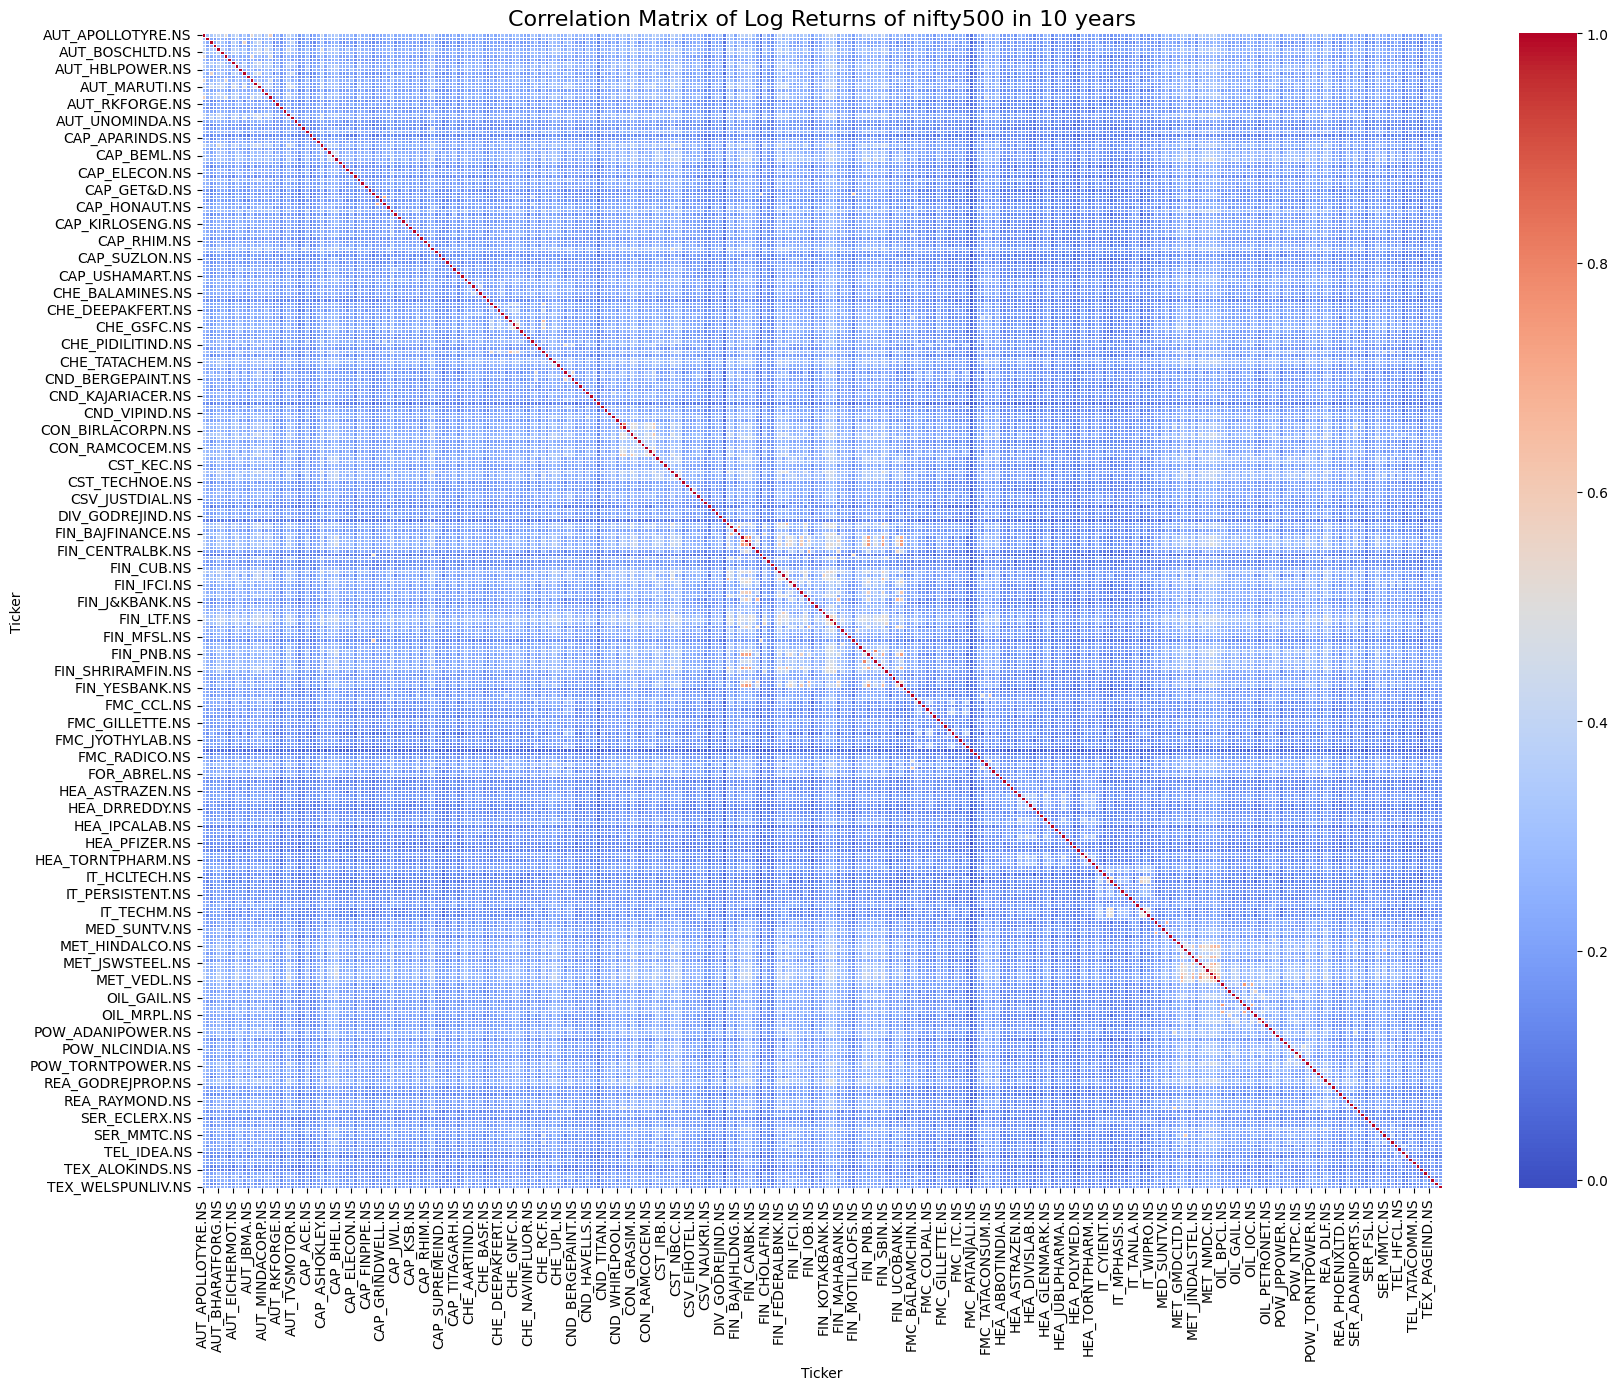

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,15))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Correlation Matrix of Log Returns of nifty500 in 10 years", fontsize=16)
plt.savefig('Correlation Matrix of Log Returns of nifty500 in 10 years.png')
plt.show()

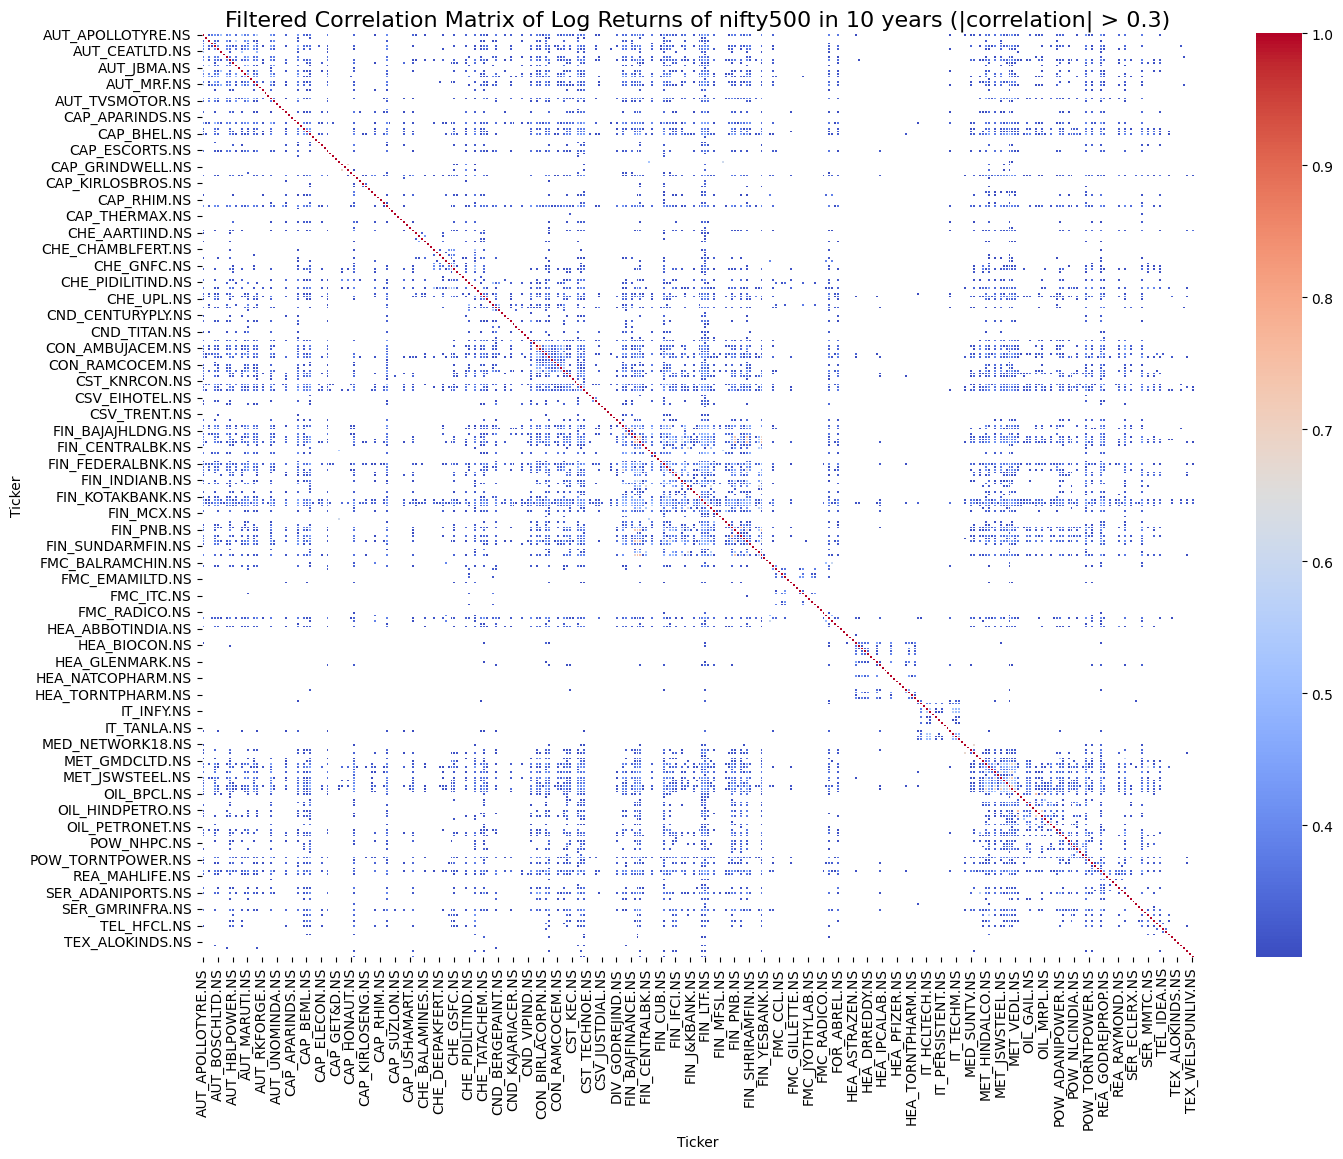

In [10]:
# Only display correlations with absolute values above 0.3
filtered_correlation = correlation_matrix[(correlation_matrix >= 0.3) | (correlation_matrix <= -0.3)]

plt.figure(figsize=(16,12))
sns.heatmap(filtered_correlation, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Filtered Correlation Matrix of Log Returns of nifty500 in 10 years (|correlation| > 0.3)", fontsize=16)
plt.savefig('Filtered Correlation Matrix of Log Returns of nifty500 in 10 years.png')
plt.show()